In [75]:
import control
import casadi as ca
import matplotlib.pyplot as plt
import numpy as np

s = control.tf([1, 0], [0, 1])

In [87]:
!

1-F16-Pitch.ipynb	HW03.ipynb   RocketController.ipynb
1-F16-Pitch.ipynb.orig	HW04.ipynb   Rocket_random_stuff.ipynb
6-Casadi-Brach.ipynb	jit_tmp.c    source.dot
analysis.py		__pycache__


In [83]:
G = (2010*s**3 + 460*s**2 + 1.794*1e-11*s-4.772*1e-13)/(s**5 + 38.85*s**4 + 2027*s**3 + 494.2*s**2-17.56*s)
H = 1
print(G)
Go = control.minreal(G*H, 1e-2)
print(Go)


  2010 s^3 + 460 s^2 + 1.794e-11 s - 4.772e-13
------------------------------------------------
s^5 + 38.85 s^4 + 2027 s^3 + 494.2 s^2 - 17.56 s

1 states have been removed from the model

        2010 s^2 + 460 s - 1.482e-05
--------------------------------------------
s^4 + 38.85 s^3 + 2027 s^2 + 494.2 s - 17.56



[-2, 2, -2, 2]

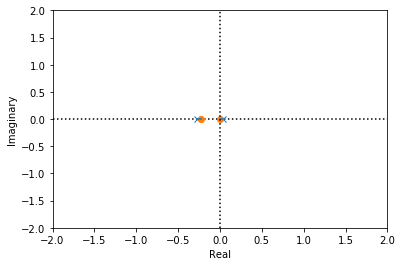

In [86]:
control.rlocus(Go);
#plt.plot([0, -100], [0, 50])
plt.axis([-2, 2, -2, 2])

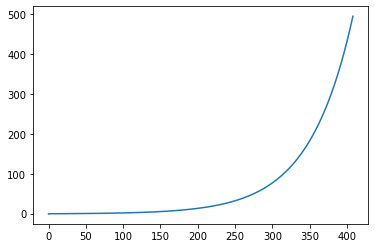

In [73]:
Gc = control.feedback(Go)
t, y = control.step_response(Gc)
plt.plot(t, y - 1)

In [5]:
Hd = control.tf2ss(control.c2d(H, 0.01))
Hd

A = [[0.90483742]]

B = [[10.]]

C = [[19.03251639]]

D = [[2000.]]

dt = 0.01

In [6]:
x = ca.SX.sym('x', 2)
u = ca.SX.sym('u', 1)

x1 = ca.mtimes(Hd.A, x) + ca.mtimes(Hd.B, u)
y = ca.mtimes(Hd.C, x) + ca.mtimes(Hd.D, u)

ca.Function('control', [x, u], [x1, y], ['x', 'y'], ['x1', 'y'])

Function(control:(x[2],y)->(x1[2],y[2]) SXFunction)